<a href="https://colab.research.google.com/github/AnYeongJu/Digital-image-processing/blob/main/%EB%94%94%EC%A7%80%ED%84%B8%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 모폴로지 (침식, 팽창, 열림, 닫힘)

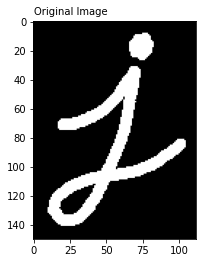

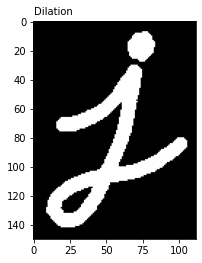

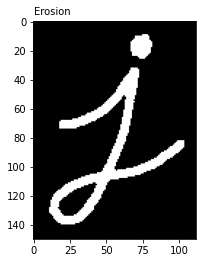

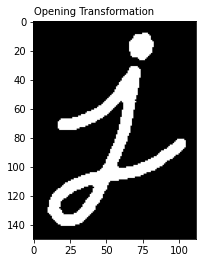

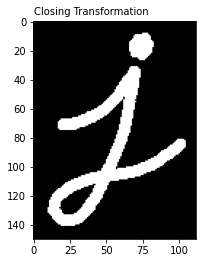

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt 
import cv2

#원본영상 불러옴
orig_img=plt.imread('i.png')
structuring_element=np.array([[0, 1, 0],
                              [1, 1, 1],
                              [0, 1, 0]])

def convolution_dilation(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
                sum=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk]).sum()
                if(sum>0):
                    op_img[x1-int(xk/2),y1-int(yk/2)]=1
                else:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=0
    return op_img

def convolution_erosion(ker_mat,img):
    xk,yk = ker_mat.shape
    x,y = img.shape
    img_pad=np.zeros((x+xk-1,y+yk-1))
    img_pad[xk-int(xk/2)-1:xk-1-int(xk/2)+x,yk-int(yk/2)-1:yk-int(yk/2)-1+y]=img
    op_img=np.zeros_like(img)
    for x1 in range(int(xk/2),int(xk/2)+x):
        for y1 in range(int(yk/2),int(yk/2)+y):
                sum=(ker_mat*img_pad[x1-int(xk/2):x1-int(xk/2)+xk,y1-int(yk/2):y1-int(yk/2)+yk]).sum()
                if sum==5:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=1
                else:
                    op_img[x1-int(xk/2),y1-int(yk/2)]=0
    return op_img

def rgb2gray(img):
    r,g,b = img[:,:,0],img[:,:,1],img[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def gray2binary(gray):
    return (127 < gray) & (gray <= 255)

im = gray2binary(rgb2gray(np.array(Image.open('i.png'))))
im_dilation=convolution_dilation(structuring_element,im)
im_erosion=convolution_erosion(structuring_element,im)
im_ot=convolution_erosion(structuring_element,convolution_dilation(structuring_element,im))
im_ct=convolution_dilation(structuring_element,convolution_erosion(structuring_element,im))
pil_img_d=Image.fromarray(im_dilation).convert('RGB')
pil_img_e=Image.fromarray(im_erosion).convert('RGB')
pil_img_ot=Image.fromarray(im_ot).convert('RGB')
pil_img_ct=Image.fromarray(im_ct).convert('RGB')
plt.imshow(orig_img)
plt.text(0,-5,"Original Image")
plt.show()
plt.imshow(pil_img_d)
plt.savefig('res_dilation')
plt.text(0,-5,"Dilation")
plt.show()
plt.imshow(pil_img_e)
plt.savefig('res_erosion')
plt.text(0,-5,"Erosion")
plt.show()
plt.imshow(pil_img_ot)
plt.savefig('res_opening_transformation')
plt.text(0,-5,"Opening Transformation")
plt.show()
plt.imshow(pil_img_ct)
plt.savefig('res_closinging_transformation')
plt.text(0,-5,"Closing Transformation")
plt.show()

2. Otsu 방법

In [ ]:
import cv2
import numpy as np

# 오츠
def threshold_otsu(gray, min_value=0, max_value=255):

    # 히스토그램 계산
    hist = [np.sum(gray == i) for i in range(256)]

    s_max = (0,-10)

    for th in range(256):
        
        # 클래스 1과 클래스 2의 픽셀 수 계산
        n1 = sum(hist[:th])
        n2 = sum(hist[th:])
        
        # 클래스 1과 클래스 2의 픽셀 값의 평균 계산
        if n1 == 0 : mu1 = 0
        else : mu1 = sum([i * hist[i] for i in range(0,th)]) / n1   
        if n2 == 0 : mu2 = 0
        else : mu2 = sum([i * hist[i] for i in range(th, 256)]) / n2

        # 클래스 간 분산의 분자 계산
        s = n1 * n2 * (mu1 - mu2) **2

        # 클래스 간 분산 분자가 최대 일 때 클래스 간 분산 분자와 임계 값을 기록합니다.
        if s > s_max[1]:
            s_max = (th, s)
    
    # 클래스 간 분산이 최대 일 때 임계 값을 가져옵니다.
    t = s_max[0]

    # 계산 된 임계 값으로 이진화 처리
    gray[gray < t] = min_value
    gray[gray >= t] = max_value

    return gray



# 입력 이미지 불러오기
img = cv2.imread("Lenna.png")

# 그레이 스케일 변환
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th = threshold_otsu(gray)

# 결과 출력
cv2.imwrite("Lenna.png", th)

True

otsu threshold: 124.0


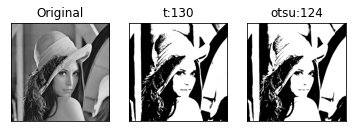

In [ ]:
import numpy as np
import cv2

img = cv2.imread('Lenna.png', cv2.IMREAD_GRAYSCALE) 
# 경계 값을 130으로 지정  ---①
_, t_130 = cv2.threshold(img, 130, 255, cv2.THRESH_BINARY)        
# 경계 값을 지정하지 않고 OTSU 알고리즘 선택 ---②
t, t_otsu = cv2.threshold(img, 0, 255,  cv2.THRESH_BINARY | cv2.THRESH_OTSU) 
print('otsu threshold:', t)                 # Otsu 알고리즘으로 선택된 경계 값 출력

imgs = {'Original': img, 't:130':t_130, 'otsu:%d'%t: t_otsu}
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(1, 3, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])

plt.show()

3. k-mean 알고리즘

In [ ]:
#평면상의 점으로 기본적인 K-means 구현
from random import *

#1. Data 생성
#임으로 (0<=x<=10 , 0<=y<=10) or (20<=x<=30, 20<=y<=30)에 점 50개 생성
n=50
x_values=[]
y_values=[]

for i in range(n):
    choose=randrange(2)
    x=0
    y=0
    
    if choose==0:
        x=randint(0,10)
        y=randint(0,10)
        
    else:
        x=randint(20,30)
        y=randint(20,30)
        
    x_values.append(x)
    y_values.append(y)
    
print(x_values)
print(y_values)

[4, 2, 4, 27, 5, 2, 7, 26, 27, 7, 7, 28, 7, 28, 22, 25, 30, 5, 3, 20, 0, 2, 7, 22, 7, 9, 10, 28, 6, 30, 9, 7, 5, 2, 3, 26, 3, 23, 4, 3, 20, 30, 20, 1, 21, 24, 21, 25, 22, 20]
[4, 7, 2, 25, 8, 9, 10, 21, 27, 8, 2, 22, 5, 26, 24, 22, 30, 9, 4, 20, 4, 0, 1, 25, 8, 9, 2, 25, 2, 28, 8, 10, 7, 1, 5, 27, 2, 24, 10, 8, 28, 25, 23, 4, 20, 27, 20, 25, 22, 25]


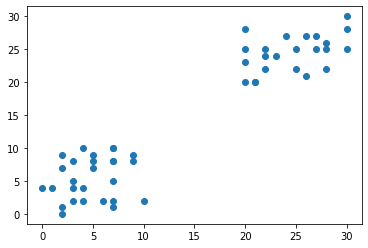

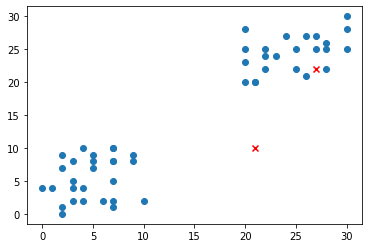

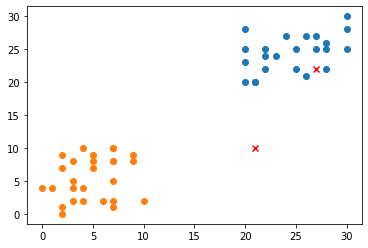

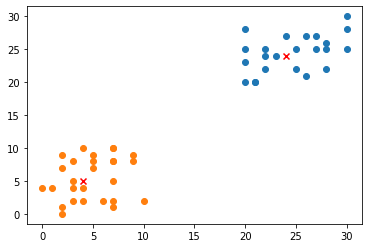

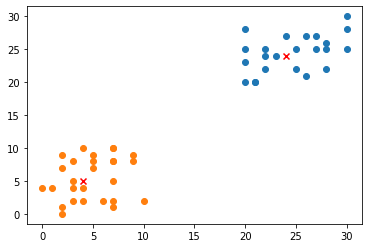

In [ ]:
#2. K-means 클러스터링 시작 
#2-a. 좌표에 data 확인
import matplotlib.pyplot as plt
plt.scatter(x_values,y_values)
plt.show()

#2-b. 클러스터의 초기 개수 설정
n_cluster=2 #클러스터의 초기 개수

#n_cluster개의 초기 중심값 선정
center_x=[]
center_y=[]

for i in range(n_cluster):
    cx=randint(0,30)
    cy=randint(0,30)
    
    center_x.append(cx)
    center_y.append(cy)

plt.scatter(x_values,y_values)
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()

#2-c. 데이터들을 중심값에서 가장 가까운 중심값으로 클러스터
cluster=[[[],[]] for i in range(n_cluster)]

for i in range(n):
    cluster_num=-1 #배정되는 클러스터
    min_d=float("inf") #가장 가까운 거리
    
    for c in range(n_cluster):
        #(루트 생략)
        distance=abs(x_values[i]-center_x[c])**2+abs(y_values[i]-center_y[c])**2
        
        if min_d>distance:
            min_d=distance
            cluster_num=c
        
    #클러스터 배정
    cluster[cluster_num][0].append(x_values[i])
    cluster[cluster_num][1].append(y_values[i])

    
color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']    
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()

#2-d. 같은 클러스터내 데이터들의 평균값으로 중심값 재조정
for c in range(n_cluster):
    center_x[c]=sum(cluster[c][0])//len(cluster[c][0])
    center_y[c]=sum(cluster[c][1])//len(cluster[c][1])
    
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()

#2-e,r. (c)부터 반복하면서 더 이상 중심값 이동이 없을 경우 중단
while True:
    move=0
    
    #2-c. 데이터들을 중심값에서 가장 가까운 중심값으로 클러스터
    cluster=[[[],[]] for i in range(n_cluster)]

    for i in range(n):
        cluster_num=-1 #배정되는 클러스터
        min_d=float("inf") #가장 가까운 거리

        for c in range(n_cluster):
            #(루트 생략)
            distance=abs(x_values[i]-center_x[c])**2+abs(y_values[i]-center_y[c])**2

            if min_d>distance:
                min_d=distance
                cluster_num=c

        #클러스터 배정
        cluster[cluster_num][0].append(x_values[i])
        cluster[cluster_num][1].append(y_values[i])
    
    #2-d. 같은 클러스터내 데이터들의 평균값으로 중심값 재조정
    for c in range(n_cluster):
        ncenter_x=sum(cluster[c][0])//len(cluster[c][0])
        ncenter_y=sum(cluster[c][1])//len(cluster[c][1])
    
        if ncenter_x!=center_x[c] or ncenter_y!=center_y[c]:
            move=1
            center_x[c]=ncenter_x
            center_y[c]=ncenter_y
    
    #더 이상의 중심값 이동 없는 경우 중단
    if move==0:
        break
for c in range(n_cluster):
    plt.scatter(cluster[c][0],cluster[c][1],c=color[c])
plt.scatter(center_x,center_y, c='red',marker='x')
plt.show()